<a href="https://colab.research.google.com/github/AshrithSagar/CP220-M4RAS-2024/blob/main/6_hw_cp220_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**HW6**

Schur Decomposition <br>
Power Iteration <br>
QR Algorithm <br>
Jordan Normal Form <br>
Pseudo Inverse <br>
Singular Value based Low Rank Approximation <br>
Iterative Closest Point Algorithm <br>




In [1]:
import numpy as np
from IPython.display import display, Latex

---
**Schur Decomposition**

Any square matrix can be decomposed as

$A = QTQ^H$ where Q is Unitary and T is upper triangular.

Further $T = D + N$ where $D$ is diagonal with eigen values and $N$ is a nilpotent matrix (upper triangular with main diagonal and lower 0).

For a Nilpotent matrix $N \in ℜ^{n \times n}$, $N^k=0$ for some $2 \leq k \leq n$

---
**Nilpotent Matrix**

Any square matrix such that $A^k=0$ for some k is a nil potent matrix.

Example

$N = \begin{bmatrix} 0 & 1 & 1 \\ 0 & 0 & 1 \\ 0 & 0 & 0 \end{bmatrix}$

All the eigenvalues of a nilpotent matrix are 0.

Recall that $Ker(A) = \{v | Av = 0\}$

Hence Eigenspace of A corresponding to 0 eigenvalue is $Ker(A-\lambda I ) = Ker(A)$

We can easily show that <br>
$Ker(A) \subset Ker(A^2) \subset ...\subset Ker(A^k)$ where $A^k$ = 0 and hence $Ker(A^k)$ = entire vector space.

Thus if $v_k$ is an eigen vector of $A^k$ then $Av_k = v_{k-1}$ is an eigenvector of $A^{k-1}$



In [2]:
N = np.array([[2,2,-2],
              [5,1,-3],
              [1,5,-3]])
print(N@N)
print(N@N@N)

[[12 -4 -4]
 [12 -4 -4]
 [24 -8 -8]]
[[0 0 0]
 [0 0 0]
 [0 0 0]]


---
The index of N in above example is 3 as $N^3=0$ and $N \neq 0 $ and $N^2 \neq 0$

Let $v_3 \in Ker(N^3)$. Then $N^3v_3=0$

Since the entire vector space is the null space, we will arbitarily choose $v_3=\begin{bmatrix} 1 & 0 & 0 \end{bmatrix}$

Let $v_2 = Nv_3$

Let $v_1 = Nv_2$

Then let $M=\begin{bmatrix} v_3 & v_2 & v_1 \end{bmatrix}$

$NM = \begin{bmatrix} v_2 & v_1 & 0 \end{bmatrix} = MJ$ where $J=\begin{bmatrix} 0 & 1 & 0 \\ 0 & 0 & 1 \\ 0 & 0 & 0 \end{bmatrix}$

Hence we can make $N$ similar to $J$ via $N=MJM^{-1}$

In [3]:
v3 = np.array([1,0,0]).reshape(3,1)
v2 = N@v3
v1 = N @v2

M = np.hstack([v1,v2,v3])

print(f"M={M}")

print(f"NM = {N@M}")

display(Latex("$Check\ that\ J=M^{-1}NM$"))
print(f"J={np.linalg.inv(M)@N@M}")

M=[[12  2  1]
 [12  5  0]
 [24  1  0]]
NM = [[ 0 12  2]
 [ 0 12  5]
 [ 0 24  1]]


<IPython.core.display.Latex object>

J=[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 4.44089210e-16  1.11022302e-16  1.00000000e+00]
 [ 1.99840144e-15 -3.33066907e-16  5.55111512e-17]]


---
**Jordan Normal Form**

For a square matrix $A$ which is $n \times n$ which is "defective", i.e. the sum of dimensions of their eigen subspaces is less than $n$ (in other words, geometric multiplicity of some eigen values is less than the corresponding algebraic multiplicity), they dont have a full complement of eigen vectors to get diagonalized.

However, they can still be brought close to a diagonal (with '1' above the diagonal for every missing eigen vector), in what are called Jordan blocks.

For example a 2x2 jordan block looks like:

$J=\begin{bmatrix} \lambda & 1  \\ 0 & \lambda \end{bmatrix}$.

A 3x3 jordan block like $J=\begin{bmatrix} \lambda & 1 & 0 \\ 0 & \lambda & 1 \\ 0 & 0 & \lambda \end{bmatrix}$.

and so on (a 1x1 jordan block is just the 1x1 matrix with the eigen value).

**IMP**: Jordan proved that any square matrix over the field of complex numbers can be represented as $A = MDM^{-1}$ where $D = \begin{bmatrix}J_1 & 0 & 0 & ... \\ 0 & J_2 & 0 & ... \\ 0 & 0 & J_3 & ... \end{bmatrix}$ and $J_i$ are Jordan blocks of size anywhere from 1 to n, depending on the matrix $A$. The number of Jordan blocks is the number of indepedent eigen vectors of $A$.

Thus for any matrix $A$, $det(A) = det(MDM^{-1})=det(D)=\prod_i \lambda_i$ (determinant is the product of eigen values as the Jordan block $D$ is triangular.

Similarly $tr(A) = tr(MDM^{-1}) = tr(D) = \sum_i \lambda_i$ (trace is the sum of eigen values as the Jordan block is upper triangular)

Note:$trace(ABC)=trace(BCA)=trace(CAB)$ provided that those multiplications are possible.

A Jordan block $J(\lambda,k)$ of size $k \times k$ , raised to power n, results in $J^n=\begin{bmatrix} \lambda^n & n \lambda^{n-1} & (n-1) \lambda^{n-2} & ... \\ 0 & \lambda^{n-1} & n\lambda^{n-1}  & ... \\ 0 & 0 & \lambda^n & ...\\ ... \end{bmatrix}_{kxk}$

Hence if $p(\cdot)$ is the characteristic polynomial for a matrix $A$, then the matrix equation, $p(A)=0$ holds as it holds for each Jordan block (and each of its elements) (which is the Cayley Hamilton theorem).


If $A=MDM^{-1}$  where $D$ is the Jordan normal form, then

$e^A = I + A + \frac{1}{2!}A^2 + \frac{1}{3!}A^3+... = I+MDM^{-1} + \frac{1}{2!}MD^2M^{-1} + \frac{1}{3!}MD^3M^{-1}+... = M(I+D+\frac{1}{2!}D^2+\frac{1}{3!}D^3+..)M^{-1}=Me^DM^{-1}$

Using the expansions of $\frac{de^{\lambda t}}{d\lambda}=te^{\lambda t}$, $\frac{d^2e^\lambda t}{d\lambda^2}=t^2e^{\lambda t}$ and so on,

we can show that if $J$ is a Jordan block of size $k \times k$ with eigen value $\lambda$, then

$e^{Jt} = \begin{bmatrix}e^{\lambda t} & te^{\lambda t} & t^2e^{\lambda t} & ... \\ 0 & e^{\lambda t} & te^{\lambda t} & ... \\ ... \end{bmatrix}_{kxk}$ .

Consider a Jordan sub-block of size $kxk$ with eigen value $\lambda$ of a matrix $A$. Then, $Av_1 = \lambda v_1$ or $(A-\lambda I)v_1=0$ with $v_1$ as its eigen vector. A vector $Av_2 = \lambda v_2 + v_1$ is a generalized eigen vector which also satisfies $(A-\lambda I)^2v_2 = 0$. In general we can find a string of vectors $v_k, v_{k-1}, .... v_1$ such that $(A-\lambda I )v_j = v_{j-1}$ . such a string is called a Jordan string. Note that $v_j$ is in the null space of $(A-\lambda I)^j$.




---
**Generalized Eigenvalue Problem**

A problem were we want to $min_x x^TAx$ such that $x^TBx=1$ can be solved via putting a lagrangian cost function

$min_x L(x) = x^TAx - \lambda(x^TBx-1)$

$\nabla L = 2Ax - 2\lambda Bx = 0$

Hence we need to solve $Ax = \lambda Bx$ which is called the generalized eigen value problem

If $B$ is invertible, then the above is same as $B^{-1}Ax = \lambda x$ and we can find eigen values of $B^{-1}A$

Otherwise we need to find the roots of the charateristic polynomial $p(\lambda)=det(A-\lambda BI)$

---
**Q1**

Let $S=\begin{bmatrix}x_1 & x_2\end{bmatrix}_{2x2}$. What are the eigen values and eigen vectors of


a) $A = S\begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix}S^{-1}$

b) $B = S\begin{bmatrix} 2 & 3 \\ 0 & 1 \end{bmatrix}S^{-1}$

Ans:

(a)
We can see that $\mathbf{A}$ is put in its diagonal form, thereby the eigen values are $\boxed{ \{ 2, 1 \} }$

(b)
The matrix is in expressed in its Jordan form.
The eigen values are $\boxed{ \{ 2, 1 \} }$ again.


In [4]:
C = np.array([[2,3],[0,1]])
D, M = np.linalg.eig(C)
print(f"eigen values of C={D}")
print(f"eigen vectors of C are columns of {M}")

eigen values of C=[2. 1.]
eigen vectors of C are columns of [[ 1.         -0.9486833 ]
 [ 0.          0.31622777]]


---
**Q2**

Let $A^2 = -I$

a) What are the eigen values of $A$

b) If A is a real $n \times n$ matrix, then show that $n$ must be even.

Ans:

(a).
Given  $\mathbf{A}^2 = -\mathbf{I}$, and assuming $\lambda$ is an eigenvalue of $\mathbf{A}$, we have
\begin{align*}
    \mathbf{A} \mathbf{x}
    &=
     \lambda \mathbf{x}
    \\
    \implies
    \mathbf{A}^2 \mathbf{x}
    &=
    \lambda \mathbf{A} \mathbf{x}
    =
    \lambda^2 \mathbf{x}
    \\
    \implies
    -\mathbf{x}
    &=
    \lambda^2 \mathbf{x}
\end{align*}
from which we get $\lambda^2 = -1 \implies \lambda = \pm i$.

Thereby, the eigenvalues of $\mathbf{A}$ are $\boxed{\pm i}$.

(b).
Let $\mathbf{A}$ be a real $n \times n$ matrix.
From this, we can see that it's characteristic polynomial is of degree $n$ and has all real coefficients.

From the fundamental theorem of algebra, we know that a polynomial of odd degree has at least one real root.
Thus, if $n$ is odd, then the characteristic polynomial of $\mathbf{A}$ has a real root, which is a contradiction to the statement that the eigenvalues of $\mathbf{A}$ are $\pm i$.

Thereby, $n$ cannot be odd.
Hence, $n$ <u>must be even</u>.


---
**Q3**

$N$ is a nilpotent matrix if $N^k$ = 0 for some $k$.

a) Find a $N \neq 0$, $N^2 \neq 0$ but $N^3 = 0$

b) Show that $N$ cannot be symmetric

Ans:

(a).
The canonical example of a $3 \times 3$ nilpotent matrix is
\begin{equation*}
    \boxed{
    \mathbf{N}
    =
    \begin{bmatrix}
        0 & 1 & 0
        \\
        0 & 0 & 1
        \\
        0 & 0 & 0
    \end{bmatrix}
    }
    \neq \mathbf{0}
    \implies
    \mathbf{N}^2
    =
    \begin{bmatrix}
        0 & 0 & 1
        \\
        0 & 0 & 0
        \\
        0 & 0 & 0
    \end{bmatrix}
    \neq \mathbf{0}
    \implies
    \mathbf{N}^3
    =
    \begin{bmatrix}
        0 & 0 & 0
        \\
        0 & 0 & 0
        \\
        0 & 0 & 0
    \end{bmatrix}
    =
    \mathbf{0}
\end{equation*}

(b).
Symmetric matrices are diagonalisable and have real eigenvalues.
The diagonal matrix of a nilpotent matrix has all zeros on its diagonal, since all its eigenvalues are zero.
Thus, any nilpotent symmetric matrix is similar to the zero matrix.

Thereby, a <u>nilpotent matrix cannot be symmetric</u>.
The zero matrix is the only nilpotent symmetric matrix.


---
**Q4**

Let $A=\begin{bmatrix}2 & 1 \\ 0 & 2 \end{bmatrix}$

a) what are the eigen values?

b) What is the dimension of the eigen subspaces?

c) Use numpy to find the eigen values and vectors. comment on what you observe.

Ans:

(a)
For triangular matrices, the eigen values are the diagonal elements.
Thereby, the eigen values of $\mathbf{A}$ are $\boxed{ \{ 2 \} }$, with multiplicity 2.

(b)
We can observe that the matrix $\mathbf{A}$ is in the Jordan form.
The dimension of the eigensubspace for the eigenvalue 2 is 1.


In [5]:
A = np.array([[2, 1],[0,2]])
D, V = np.linalg.eig(A)
print(f"D = {D}")
print(f"V = {V}")
V_inv = np.linalg.inv(V)
print(f"V_inv = {V_inv}")
A_reconstructed = V @ np.diag(D) @ V_inv
print(f"A_reconstructed={A_reconstructed}")

D = [2. 2.]
V = [[ 1.0000000e+00 -1.0000000e+00]
 [ 0.0000000e+00  4.4408921e-16]]
V_inv = [[1.00000000e+00 2.25179981e+15]
 [0.00000000e+00 2.25179981e+15]]
A_reconstructed=[[2. 0.]
 [0. 2.]]


---
**Square root of a positive definite matrix**

Recall that if a Hermitian matrix $A$ is positive definite if $x^HAx >0$ for all $x \neq 0$

Then the eigen values of $A$ are real and positive.

Analogous to being able to find square root of a positive number, we can then take the square of the matrix $A$ as

$A = RR^H$

Since $A$ is Hermitian - it is diagonalizable as $A=Q\Lambda Q^H$, where $Q$ is unitary. Therefore taking $R=Q\sqrt{\Lambda}$ results in $A=RR^H$

Alternatively, $A = LDL^H$ via gaussian elimination, where D is a diagonal matrix with all positive pivots. Hence $R=L\sqrt{D}$ gives $RR^H$ , which is cholesky decomposition.


Whenever we need to solved $Ax=b$ and if $A$ is positive definite, then when
$A$ is large and sparse, it is computationally faster to do cholesky decomposition (rather than LU) and then solve the linear system.


---
**Q5**

Let $A = \begin{bmatrix} 1 & 2 \\ 4 & 5 \\ 7 & 8 \\ 10 & 11 \end{bmatrix}$ and $b=\begin{bmatrix} 2 \\ 3 \\ 4 \\5 \end{bmatrix}$

Use cholesky factorization to solve $\hat{x} = \arg min_x ||Ax-b||$



Ans:


over to numpy

In [6]:
# contd.
A = np.array([[1, 2], [4, 5], [7, 8], [10, 11]])
b = np.array([2, 3, 4, 5])

print(f"A.Tb={A.T@b}")

A.Tb=[ 92 106]


In [7]:
# contd.
A = np.array([[1, 2], [4, 5], [7, 8], [10, 11]])
b = np.array([1, 2, 3, 4])

print(f"L={L} y={y} x = {x}")

NameError: name 'L' is not defined

---
**Geometric interpretation of quadratic form**

$x^TAx = 1$ defines an ellipsoid.

If $A$ is positive definite, then $A=Q^TDQ$ and $x^TQ^TDQx = y^TDy = \sum \lambda_i y_i^2 = 1$, is an ellipsoid with each axis length proportional to $\frac{1}{\sqrt{\lambda_i}}$. Note the axes point along the eigen vectors of $A$ (which are the columns of $Q$)

---
**Q5**

If $A$ is  positive definite, and $C$ non-singular, then show that $B=C^TAC$ is also positive definite.

Ans:

Consider $\mathbf{y}^T \mathbf{B} \mathbf{y} = \mathbf{y}^T (\mathbf{C}^T \mathbf{A} \mathbf{C}) \mathbf{y} = (\mathbf{y}^T \mathbf{C}^T) \mathbf{A} (\mathbf{C} \mathbf{y}) = (\mathbf{C} \mathbf{y})^T \mathbf{A} (\mathbf{C} \mathbf{y})$.

Let $\mathbf{z} = \mathbf{C} \mathbf{y}$.
Then, $\mathbf{y}^T \mathbf{B} \mathbf{y} = \mathbf{z}^T \mathbf{A} \mathbf{z}$.

Since $\mathbf{C}$ is non-singular, i.e., $\mathbf{C}$ is of full rank and hence it's nullity is zero, by the rank-nullity theorem.

From this, we can see that whenever $\mathbf{y} \neq \mathbf{0}$, we have $\mathbf{z} = \mathbf{C} \mathbf{y} \neq \mathbf{0}$.

The converse is also true.
Whenever $\mathbf{z} \neq \mathbf{0}$, we have $\mathbf{y} = \mathbf{C}^{-1} \mathbf{z} \neq \mathbf{0}$.

Since $\mathbf{A}$ is positive definite, we have $\mathbf{x}^T \mathbf{A} \mathbf{x} > 0$ for all $\mathbf{x} \neq \mathbf{0}$.

Thereby, we can see that whenever $\mathbf{z} \neq \mathbf{0}$, we have $\mathbf{z}^T \mathbf{A} \mathbf{z} > 0 \implies \mathbf{y}^T \mathbf{B} \mathbf{y} > 0$.

Hence, $\mathbf{y}^T \mathbf{B} \mathbf{y} > 0, \forall \mathbf{y} \neq \mathbf{0}$, i.e., $\mathbf{B}$ is also positive definite.


---
**Singular Value Decomposition**


If $A$ is any matrix, then $AA^H$ and $A^HA$ are hermitian and positive semi-definite and hence have real non-negative eigen values. Also they can be diagonalized with orthogonal eigen vectors.

Let $A^TA = V\Lambda V^T$, $V$ orthogonal and with $\Lambda$ as positive eigen values. i.e $A^TAv_i = \lambda_i v_i$

Then $AA^T$ also has same eigen values with eigen vectors as $AV$. For instance, $(AA^T)Av_i = A(A^TA)v_i = A\lambda_iv_i = \lambda_i Av_i$ showing that $Av_i, \lambda_i$ is an eigen vector and value respectively of $AA^T$.

Let $\sigma_i = \sqrt({\lambda_i}$ and is called the singular value.

Choosing $u_i = \frac{1}{\sigma_i}Av_i$, we get $u_i^Tu_i = \frac{1}{\sigma_i^2}v_i^TA^TAv_i = 1$. Similarly, if $i \ne j$, $u_i^Tu_j = 0$ and hence the set of $u_1, ... $ is also orthogonal.

Thus $AA^T = U\Sigma^2U^T$

Note rank of $A^TA, AA^T\ and\ A$ are all same and let that be $r$. Then there are only $r$ non-zero eigen values for $AA^T, A^TA$ and hence there are only $r$ singular values for $A$.

if $A$ is $m \times n$ then $A = U \Sigma V^T$ is the singular value decompisition of $A$, with $U, V$ having orthogonal columns and $\Sigma$ being diagonal with non-negative values.

If rank(A) - r, then $U$ is $m \times r$, $\Sigma$ is $r \times r$ and $V$ is $r \times n$.


Thus $A = \sigma_1 u_1v_1^T + \sigma_2u_2v_2^T + ... \sigma_r u_rv_r^T$. Usually, the singular values are arranges such that $\sigma_1 \geq \sigma_2 \geq ...\geq \sigma_r$

Note that $V, U$ can be completed to be square and hence orthogonal matrices, by adding the orthogonal basis vectors of the corresonding null spaces of $A$ and $A^T$ respectively.

When $A$ acts on any vector $x$, $V, U$ being orthogonal, they dont change its length, but $\Sigma$ changes its lenght along the $r$ directions. The ratio $\sigma_1/\sigma_r$ gives an indication of the assymmetry of the scaling and is called the condition number. If this number is high, then the some computions might not be well behaved - especially in presence of noises.


---
**Matrix Norms**
https://en.wikipedia.org/wiki/Matrix_norm

for a detailed discussion see above.

The norm of a matrix is useful to know the "size" of a matrix as well as "distance" between two matrices.

The "distance" notion is useful when you have an iterative algorithm to compute a matrix and you want to check if the algorithm converges i.e. the sequence of intermediate matrices converge to some value and how fast they converge etc/

The vector space itself has a "p-norm" where

$x \in ℜ^n$ and $||x||_p = (\Sigma_{i=1}^n |x_i|^p)^\frac{1}{p}$

Then the induced matrix norm is

$||A||_p = sup_x \frac{||Ax||_p}{||x||_p} = max_x ||Ax||_p$ with $||x||_p=1$

For example $||A||_2 = max_x \sqrt(x^TA^TAx)$

When $A = U\Sigma V^T$ is the s.v.d then let $y = V^Tx$ and $||y||_2 = ||x||_2$

Hence $||A||_2^2 = max_y y^T \Sigma^2 y = \Sigma_{i=1}^{r} \sigma_i^2 y_i^2 <$ with $||y||=1$

From the above $||A||_2 = \sigma_max$ the largest singular value.


*Frobenius Norm*

this is another matrix norm where

$||A||_F = (\Sigma_{ij} |a_{ij}|^2)^\frac{1}{2} = (trace(A^T A)^\frac{1}{2} = (\Sigma_{i} \sigma_{i}^2)^\frac{1}{2} $ where $\sigma_i$ is the singular values of A


For proving convergence properties - all matrix norms are equal


---
**Pseudo Inverse**

We have seen the least squares problem

$\hat{x} = \arg \min_x ||Ax - b||$,

which was solved for the case when $A$ had full column rank as $\hat{x}=(A^TA)^{-1}A^Tb$.

But when $A$ is not full rank - with linearly dependent columns, $A^TA$ also is not full rank and its inverse doesnt exist.


In this situation, if $\hat{x}$ is a solution, then so is $\hat{x}+x_n$ , where  $x_n$ is in the nullspace of $A$, thus an infinitely many set of vectors, such that their images under $A$ are the same closest vector to $b$.

So from these, we would like pick the one with mininimum length.

Hence we can look for the minimum length $\hat{x}$ which minimizes $||Ax-b||^2$

Let $A$ be of rank $r$.

Then $A=U\Sigma V^T$, with $\Sigma$ as a $m \times n$ diagonal matrix with only $r < n$ positive singular values in the top left i.e. $\Sigma = \begin{bmatrix} \Sigma_r & 0_{n-r} \\ 0_{m-r} & 0_{m-r,n-r} \end{bmatrix}$

$\min_x ||U\Sigma V^Tx - b||^2$ which is same as $\min_x ||\Sigma V^Tx - U^Tb||^2$ as $U$ is orthogonal.

Let $y=V^Tx$, then the above problem is same as $\min_y ||\Sigma y - U^Tb||^2$

Note if $y = \begin{bmatrix} y_r \\ y_{n-r} \end{bmatrix}$ then $\Sigma y = \Sigma_r y_r $ which is a m x 1 column vector with only first r elements as nonzero.

Hence we can only determine the first r elements of y and the rest can be set to 0 as $\hat{y_r} = \begin{bmatrix}\Sigma_r^{-1} & 0_{m-r} \end{bmatrix}U^Tb$

And we can write $\hat{y} = \begin{bmatrix} \hat{y_r} \\ 0 \end{bmatrix} = \begin{bmatrix} \Sigma_r^{-1} & 0 \\ 0 & 0 \end{bmatrix} U^Tb = \Sigma^+ U^Tb$ where $\Sigma^+$ is the pseudo inverse of $\Sigma$.

$\hat{x}=V\hat{y} = V\Sigma^+U^Tb$ is the minimal length vector solving least squares.

$A^{+} = V\Sigma^+U^T$ is called the pseudo inverse of $A$.

We have the following properties:


$AA^+A = A$ and $A^+AA^+ = A^+$


$A^+AA^+ = A^+$ and $AA^+A = A$

$AA^+$ and $A^+A$ are Hermitian.




In [8]:
from scipy import datasets
img = datasets.face()

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

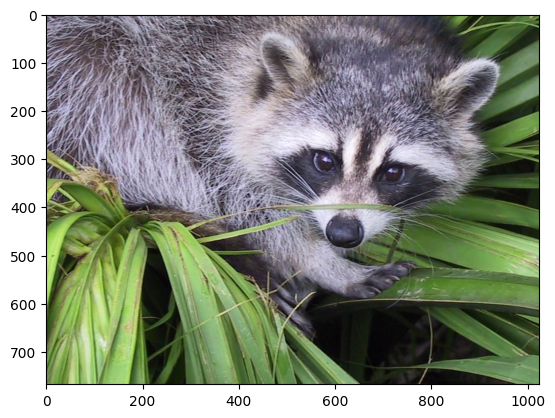

In [10]:
plt.imshow(img)
plt.show()

In [11]:
img.shape #this is a 2D matrix with 3 channels (colors for red, green, blue)

(768, 1024, 3)

In [12]:
#print the value of the 0th array (Red color)
img[:,:,0]

array([[121, 138, 153, ..., 119, 131, 139],
       [ 89, 110, 130, ..., 118, 134, 146],
       [ 73,  94, 115, ..., 117, 133, 144],
       ...,
       [ 87,  94, 107, ..., 120, 119, 119],
       [ 85,  95, 112, ..., 121, 120, 120],
       [ 85,  97, 111, ..., 120, 119, 118]], dtype=uint8)

In [13]:
#convert to numbers from 0 to 1
img_array = img / 255
#check the min and max values to make sure they are within 0 to 1
img_array.max(), img_array.min(), img_array.dtype

(1.0, 0.0, dtype('float64'))

---
Convert to grayscale by applying a filter on the three color values. More info is here: https://en.wikipedia.org/wiki/Grayscale#Colorimetric_(perceptual_luminance-reserving)_conversion_to_grayscale

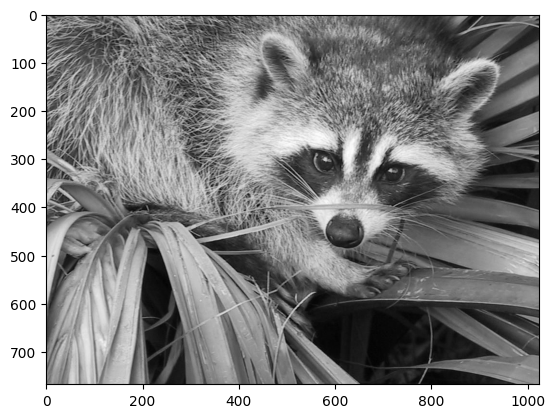

In [14]:
img_gray = img_array @ [0.2126, 0.7152, 0.0722]
plt.imshow(img_gray, cmap='gray')
plt.show()

In [15]:
# Use numpy's SVD function to obtain the factorizatin of matrix img_gray.

U,s,Vt = np.linalg.svd(img_gray)
U.shape, s.shape, Vt.shape

((768, 768), (768,), (1024, 1024))

In [16]:
#note that np returns singular values as  a linear array 's' (and not a diagonal matrix)
#we need to convert it into a diagonal
Sigma = np.zeros((U.shape[1],Vt.shape[0]))
np.fill_diagonal(Sigma,s)

In [17]:
#
img_gray_reconstructed = U @ Sigma @ Vt
np.linalg.norm(img_gray - img_gray_reconstructed)

1.5653060724847094e-12

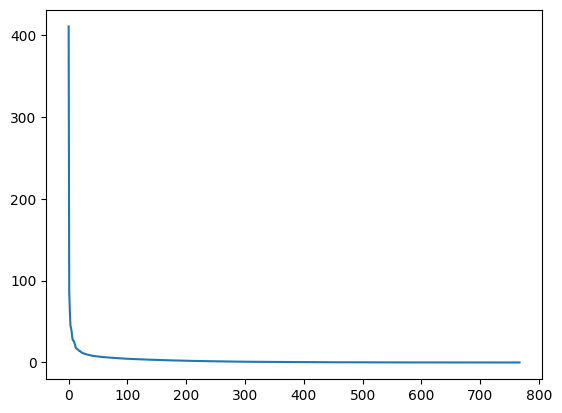

In [18]:
#plot the singular values. There are 768 of them.
#numpy returns them in decreasing order of value.

plt.plot(s)
plt.show()

Note that the original matrix $A$ of size $m x n$ can be written as a sum of
'r' rank 1 matrices where $r <= min(m,n)$ and is the rank of $A$

$A = \sum_1^r{\sigma_i U_i  V_i^T}$

So we can approximate $A$ using the $k$ largest singular values as:

$A_{approx} = \sum_1^k{\sigma_i U_i  V_i^T}$

In [19]:
# As an example, we will use the top 10 singular values
# to approximate the image array
k=35
img_gray_approx = U[:,:k] @ Sigma[:k,:k] @ Vt[:k, :]

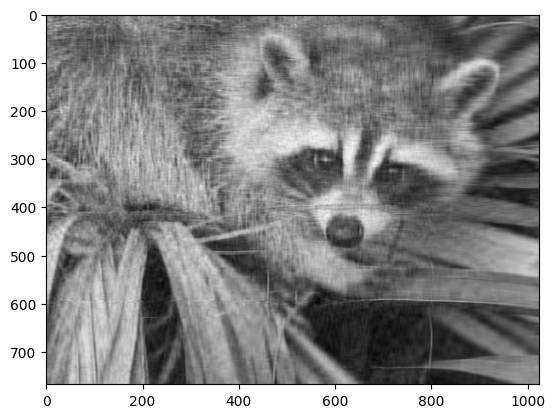

In [20]:
plt.imshow(img_gray_approx,cmap='gray')
plt.show()

---
**Q6**

If you need to compress the image to be 10% of original size,
how many singular values would you use to approximate the
original gray scale image?

In [21]:
#Your code here


Ans:

Based on the graph above, I would choose <your answer> singular values to
approximate the gray scale image.

---
**Frobenius Norm and Inner product**

Let $A = [a_{ij}]$ be a $m \times n$ matrix. Then the Frobenius nrom is defined as:

$||A||_F^2 = \sum_i \sum_j a_{ij}^2 = tr(A^TA)=tr(AA^T)$

Where $tr(\cdot)$ is the trace of a square matrix  and is the sum elements on the main diagonal.


We can define a Frobenius inner product on the space of all $m \times n$ matrices over field $K$ as

$<A,B>_F = tr(A^HB) = tr(A^TB)$ where $A^H$ is conjugate transpose and for real matrix $A^H = A^T$

Then $||A||_F^2 = <A,A>_F$

Note that $tr(AB) = tr(BA)$ where $A, B$ are $m \times n$ matrices.

Hence $tr(ABC) = tr(A(BC)) = tr((BC)A) = tr (BCA)$

So trace is invariant under cyclic shifts of order in a product of matrices.


---
**Procrustes Problem**

Given a set of points on a shape - find the best rotation, translation and scaling to match it to a reference shape.


*Orthogonal Procustes problem:* only find the rotation.


Let $A=[a_1, a_2, ...., a_n]$ be n points on shape 1 and $B=[b_1, b_2, ..., b_n]$ be the corresponding n points on shape 2.

Then let $R$ be a rotation matrix.

We need to find $\hat{R}=\arg min_R ||RA-B||_F$

Where $||\cdot||_F$ is the Frobenius (Euclidean) norm of a matrix is the sum of squares of each element.


Example:

a) Point cloud matching in robotics

b) Attitude determination of a satellite



$||RA-B||_F^2 = <RA-B,RA-B>_F = tr((A^T R^T-B^T) (RA-B))=tr(A^TR^TRA-A^TR^TB-BRA+B^TB)=tr(A^TA)+tr(B^TB)-2tr(A^TR^TB)$ since $tr(BRA) = tr((BRA)^T) = tr(A^TR^TB)$ and $R^TR = RR^T = I$ as $R$ is a orthogonal matrix.

Hence optimal $\hat{R}=\arg min_R ||RA-B||_F^2 = \arg max_R tr(A^TR^TB) = tr(R^TBA^T)$



Let $BA^T = U\Sigma V^T)$ then $\hat{R} = \arg max_R tr(R^TU\Sigma V^T) = tr(V^TR^TU\Sigma) = <Z,\Sigma>_F$


Where $Z = V^TR^TU$, which is also an orthogonal matrix.

We will show that $tr(Z\Sigma) \leq tr(\Sigma)$ for a positive definite $\Sigma$ and any orthogonal $Z$ and hence $Z=I$ is the best orthogonal matrix that maximizes $<Z,\Sigma>_F$.

Since $\Sigma$ is positive definite, then $\Sigma=W^TW$ (in this case $W$ is diagonal. Then $<Z,\Sigma>=tr(Z^TW^TW)=tr(WZ^TW^T)=<W,ZW> \leq \sqrt{<W,W><ZW,ZW>} = \sqrt{<W,W><W,W>} = <W,W>=tr(W^TW) = tr(\Sigma)$

The inequality is due to Cauchy-Schwarz inequality of inner products.

$<ZW,ZW> = tr(W^TZ^TZW) = tr (W^TW) = <W,W>$ as Z is orthogonal.


Hence $V^T\hat{R}^TU = I$ means $\hat{R}=UV^T$ is the optimal rotation that solves the problem.


---
**Scan Matching or Point Cloud Registration**



The next set of cells is taken from a nice online tutorial (with a few minor modifications): https://mybinder.org/v2/gh/niosus/notebooks/master?filepath=icp.ipynb

Given two point clouds $P=\{p_i\}$ and $Q=\{q_i\}$, the goal is to find the optimal rigid body transform (rotation and translation) that best maches the two point clouds.

A point cloud is a set of points (each with a 3D coordinate). It is usually obtained from a laser scanner (like a Lidar) or a RGBD (depth camera - RGB + depth) or a extracted from a stereo camera (which takes 2 images of the scene from two cameras and then some processing of both images is done to extract the 3D coordinates of a few points imaged from both cameras).

There are two sub-problems:

a) Find the association of points amongst the two point clouds i.e. $p_i ↔ q_{a(i)}$, where $a$ is the association function

b) Given the association, find the $\hat{R}, \hat{t} = \arg min_{R,t} \sum_{i=1}^n (Rp_i+t-q_i)^T(Rp_i+t-q_i) $, where $P=\begin{bmatrix}p_1&p_2&...p_n\end{bmatrix}$ and $Q = \begin{bmatrix} q_{a(1)} & q_{a(2)} & ... & q_{a(n)} \end{bmatrix}$.

Note $R$ is a $3 \times 3$ rotation matrix with $RR^T=R^TR=I$ and $det(R)=1$ and $t$ is a $3 \times 1$ translation vector.

Let $\bar{p} = \frac{1}{n}\sum_i p_i$ and $\bar{q} = \frac{1}{n}\sum_i q_i$

Let $L = \sum_{i=1}^n (Rp_i+t-q_i)^T(Rp_i+t-q_i) = \sum_{i=1}^n p_i^Tp_i + q_i^Tq_i +t^Tt +t^T(Rp_i-q_i) + (Rp_i-q_i)^Tt $

$\nabla_t L = \sum_{i=1}^n 2t  + 2(RP_i-q_i) = 0$

This leads to $t = -R\bar{p} + \bar{q}$


We have seen above that $\hat{R}=svd(QP^T)$ minimizes $L$ with respect to $R$.

Hence $\hat{t}=-\hat{R}\bar{p}+\bar{q}$


When data association is not known, then start with an initial guess for the association, use SVD to compute the transform, and then redo data associate, redo SVD and so on in a iterative manner, till error is below a threshold


In [22]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from math import sin, cos, atan2, pi
from IPython.display import display, Math, Latex, Markdown, HTML

In [23]:
def plot_data(data_1, data_2, label_1, label_2, markersize_1=8, markersize_2=8):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.axis('equal')
    if data_1 is not None:
        x_p, y_p = data_1
        ax.plot(x_p, y_p, color='#336699', markersize=markersize_1, marker='o', linestyle=":", label=label_1)
    if data_2 is not None:
        x_q, y_q = data_2
        ax.plot(x_q, y_q, color='orangered', markersize=markersize_2, marker='o', linestyle=":", label=label_2)
    ax.legend()
    return ax

def plot_values(values, label):
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_subplot(111)
    ax.plot(values, label=label)
    ax.legend()
    ax.grid(True)
    plt.show()

def animate_results(P_values, Q, corresp_values, xlim, ylim):
    """A function used to animate the iterative processes we use."""
    fig = plt.figure(figsize=(10, 6))
    anim_ax = fig.add_subplot(111)
    anim_ax.set(xlim=xlim, ylim=ylim)
    anim_ax.set_aspect('equal')
    plt.close()
    x_q, y_q = Q
    # draw initial correspondeces
    corresp_lines = []
    for i, j in correspondences:
        corresp_lines.append(anim_ax.plot([], [], 'grey')[0])
    # Prepare Q data.
    Q_line, = anim_ax.plot(x_q, y_q, 'o', color='orangered')
    # prepare empty line for moved data
    P_line, = anim_ax.plot([], [], 'o', color='#336699')

    def animate(i):
        P_inc = P_values[i]
        x_p, y_p = P_inc
        P_line.set_data(x_p, y_p)
        draw_inc_corresp(P_inc, Q, corresp_values[i])
        return (P_line,)

    def draw_inc_corresp(points_from, points_to, correspondences):
        for corr_idx, (i, j) in enumerate(correspondences):
            x = [points_from[0, i], points_to[0, j]]
            y = [points_from[1, i], points_to[1, j]]
            corresp_lines[corr_idx].set_data(x, y)

    anim = animation.FuncAnimation(fig, animate,
                                   frames=len(P_values),
                                   interval=500,
                                   blit=True)
    return HTML(anim.to_jshtml())

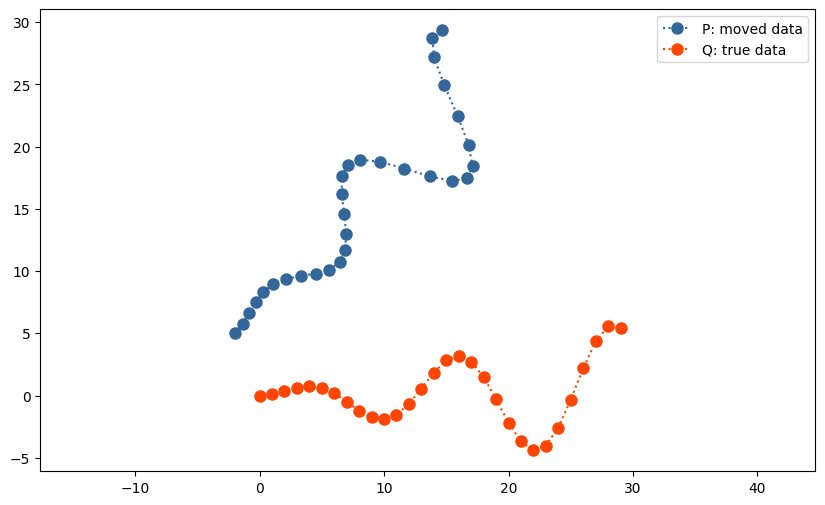

In [24]:
# initialize pertrubation rotation
angle = pi / 4
R_true = np.array([[cos(angle), -sin(angle)],
                   [sin(angle),  cos(angle)]])
t_true = np.array([[-2], [5]])

# Generate data as a list of 2d points
num_points = 30
true_data = np.zeros((2, num_points))
true_data[0, :] = range(0, num_points)
true_data[1, :] = 0.2 * true_data[0, :] * np.sin(0.5 * true_data[0, :])
# Move the data
moved_data = R_true.dot(true_data) + t_true

# Assign to variables we use in formulas.
Q = true_data
P = moved_data

plot_data(moved_data, true_data, "P: moved data", "Q: true data")
plt.show()

In [25]:
def get_correspondence_indices(P, Q):
    """For each point in P find closest one in Q."""
    p_size = P.shape[1]
    q_size = Q.shape[1]
    correspondences = []
    for i in range(p_size):
        p_point = P[:, i]
        min_dist = sys.maxsize
        chosen_idx = -1
        for j in range(q_size):
            q_point = Q[:, j]
            dist = np.linalg.norm(q_point - p_point)
            if dist < min_dist:
                min_dist = dist
                chosen_idx = j
        correspondences.append((i, chosen_idx))
    return correspondences

def draw_correspondeces(P, Q, correspondences, ax):
    label_added = False
    for i, j in correspondences:
        x = [P[0, i], Q[0, j]]
        y = [P[1, i], Q[1, j]]
        if not label_added:
            ax.plot(x, y, color='grey', label='correpondences')
            label_added = True
        else:
            ax.plot(x, y, color='grey')
    ax.legend()

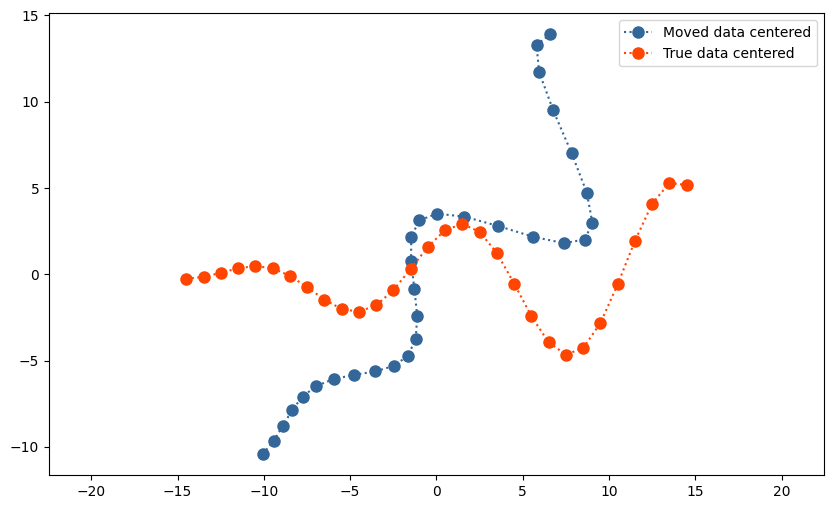

In [26]:
def center_data(data, exclude_indices=[]):
    reduced_data = np.delete(data, exclude_indices, axis=1)
    center = np.array([reduced_data.mean(axis=1)]).T
    return center, data - center

center_of_P, P_centered = center_data(P)
center_of_Q, Q_centered = center_data(Q)
ax = plot_data(P_centered, Q_centered,
               label_1='Moved data centered',
               label_2='True data centered')
plt.show()

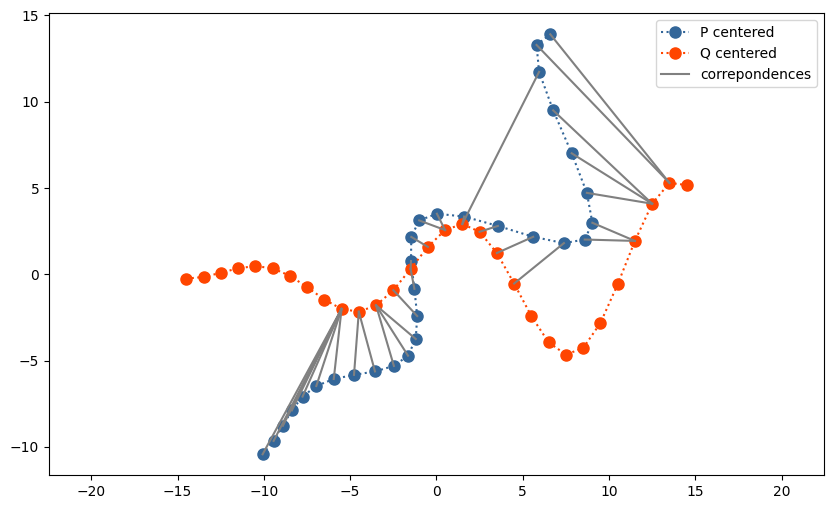

In [27]:
correspondences = get_correspondence_indices(P_centered, Q_centered)
ax = plot_data(P_centered, Q_centered,
               label_1='P centered',
               label_2='Q centered')
draw_correspondeces(P_centered, Q_centered, correspondences, ax)
plt.show()

In [28]:
def compute_cross_covariance(P, Q, correspondences, kernel=lambda diff: 1.0):
    cov = np.zeros((2, 2))
    exclude_indices = []
    for i, j in correspondences:
        p_point = P[:, [i]]
        q_point = Q[:, [j]]
        weight = kernel(p_point - q_point)
        if weight < 0.01: exclude_indices.append(i)
        cov += weight * q_point.dot(p_point.T)
    return cov, exclude_indices

cov, _ = compute_cross_covariance(P_centered, Q_centered, correspondences)
print(cov)

[[1113.97274605 1153.71870122]
 [ 367.39948556  478.81890396]]


In [29]:
U, S, V_T = np.linalg.svd(cov)
print(S)
R_found = U.dot(V_T)
t_found = center_of_Q - R_found.dot(center_of_P)
print("R_found =\n", R_found)
print("t_found =\n", t_found)

[1712.35558954   63.95608054]
R_found =
 [[ 0.89668479  0.44266962]
 [-0.44266962  0.89668479]]
t_found =
 [[  0.4278782 ]
 [-10.01055887]]


[[  0.4278782 ]
 [-10.01055887]]
[[ 0.89668479  0.44266962]
 [-0.44266962  0.89668479]]


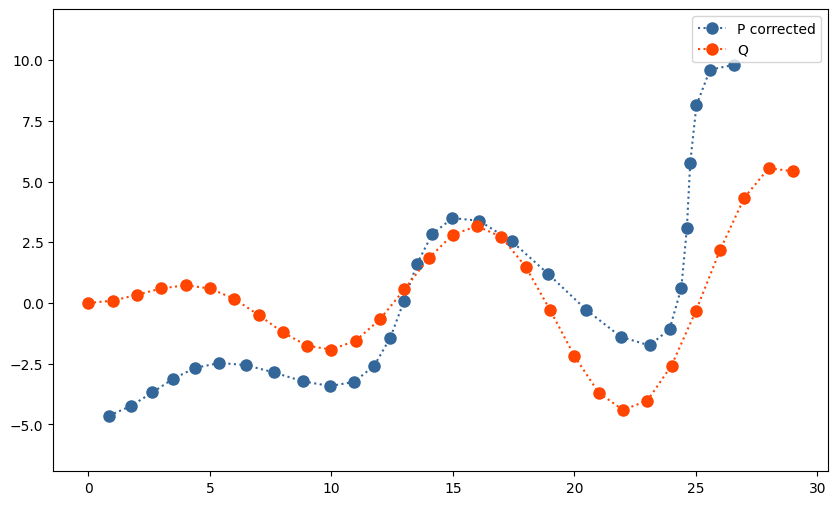

Squared diff: (P_corrected - Q) =  16.052894296516946


In [30]:
print(t_found)
print(R_found)
P_corrected = R_found.dot(P) + t_found
ax = plot_data(P_corrected, Q, label_1='P corrected', label_2='Q')
plt.show()
print("Squared diff: (P_corrected - Q) = ", np.linalg.norm(P_corrected - Q))

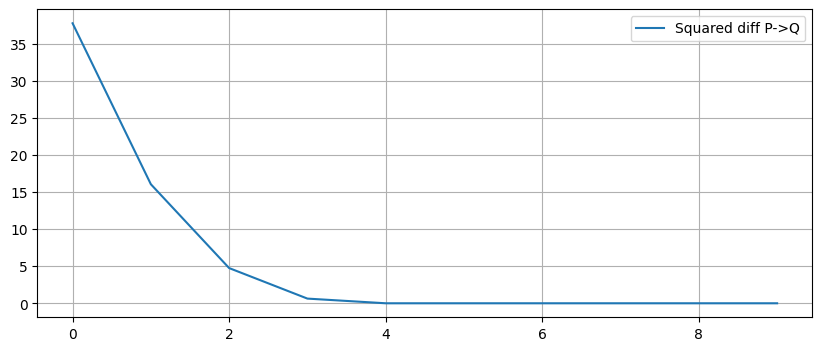

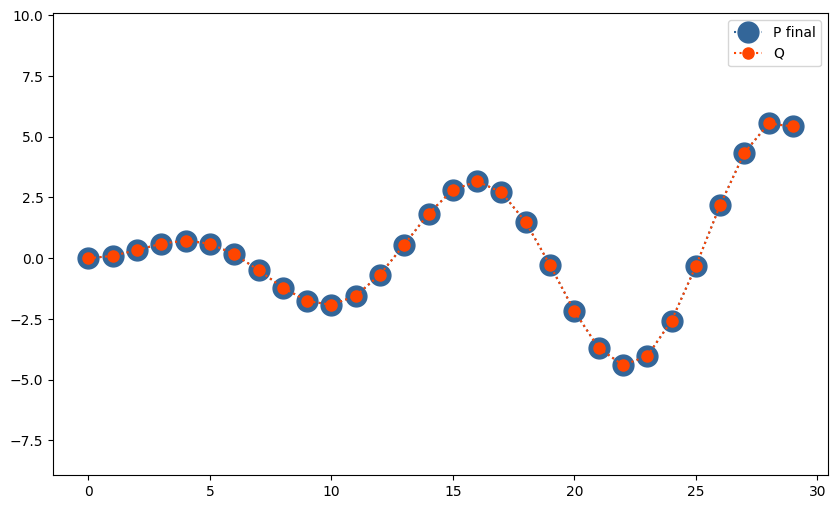

[37.7609616179743, 16.052894296516946, 4.747691495229577, 0.6307436032154957, 2.4206585735621044e-14, 2.893095071661074e-14, 3.9392818776506776e-14, 4.4564029291145016e-14, 3.8293541961232365e-14, 3.8713018783555285e-14]


In [31]:
def icp_svd(P, Q, iterations=10, kernel=lambda diff: 1.0):
    """Perform ICP using SVD."""
    center_of_Q, Q_centered = center_data(Q)
    norm_values = []
    P_values = [P.copy()]
    P_copy = P.copy()
    corresp_values = []
    exclude_indices = []
    for i in range(iterations):
        center_of_P, P_centered = center_data(P_copy, exclude_indices=exclude_indices)
        correspondences = get_correspondence_indices(P_centered, Q_centered)
        corresp_values.append(correspondences)
        norm_values.append(np.linalg.norm(P_centered - Q_centered))
        cov, exclude_indices = compute_cross_covariance(P_centered, Q_centered, correspondences, kernel)
        U, S, V_T = np.linalg.svd(cov)
        R = U.dot(V_T)
        t = center_of_Q - R.dot(center_of_P)
        P_copy = R.dot(P_copy) + t
        P_values.append(P_copy)
    corresp_values.append(corresp_values[-1])
    return P_values, norm_values, corresp_values

P_values, norm_values, corresp_values = icp_svd(P, Q)
plot_values(norm_values, label="Squared diff P->Q")
ax = plot_data(P_values[-1], Q, label_1='P final', label_2='Q', markersize_1=15)
plt.show()
print(norm_values)

In [32]:
animate_results(P_values, Q, corresp_values, xlim=(-5, 35), ylim=(-5, 35))

---
**Principal Component Analysis (PCA)**

Given a set of observations $\{d_1, d_2, ...., d_n\}$ with each observation being of dimension $p$, then $D = \begin{bmatrix} d_1 & d_2 & ... & d_n \end{bmatrix}$ is called the data matrix.

Assume that the data is centered , i.e. $\sum d_i = 0$

Then $D^T = U \Sigma V^T$ is the svd with  $V^TD = \Sigma U^T$ helps to whiten the data (removes correlation). Each singular value corresponds to variation in a component and hence looking at larger singular values helps to identify the more significant components.

(We will study the definition of correlation and the meaning of whitening in the second half of the course).

---

Consider the data collected from some survey for 9 countries as shown in the image below

(taken from "Biplots in practice" by Greenacre)

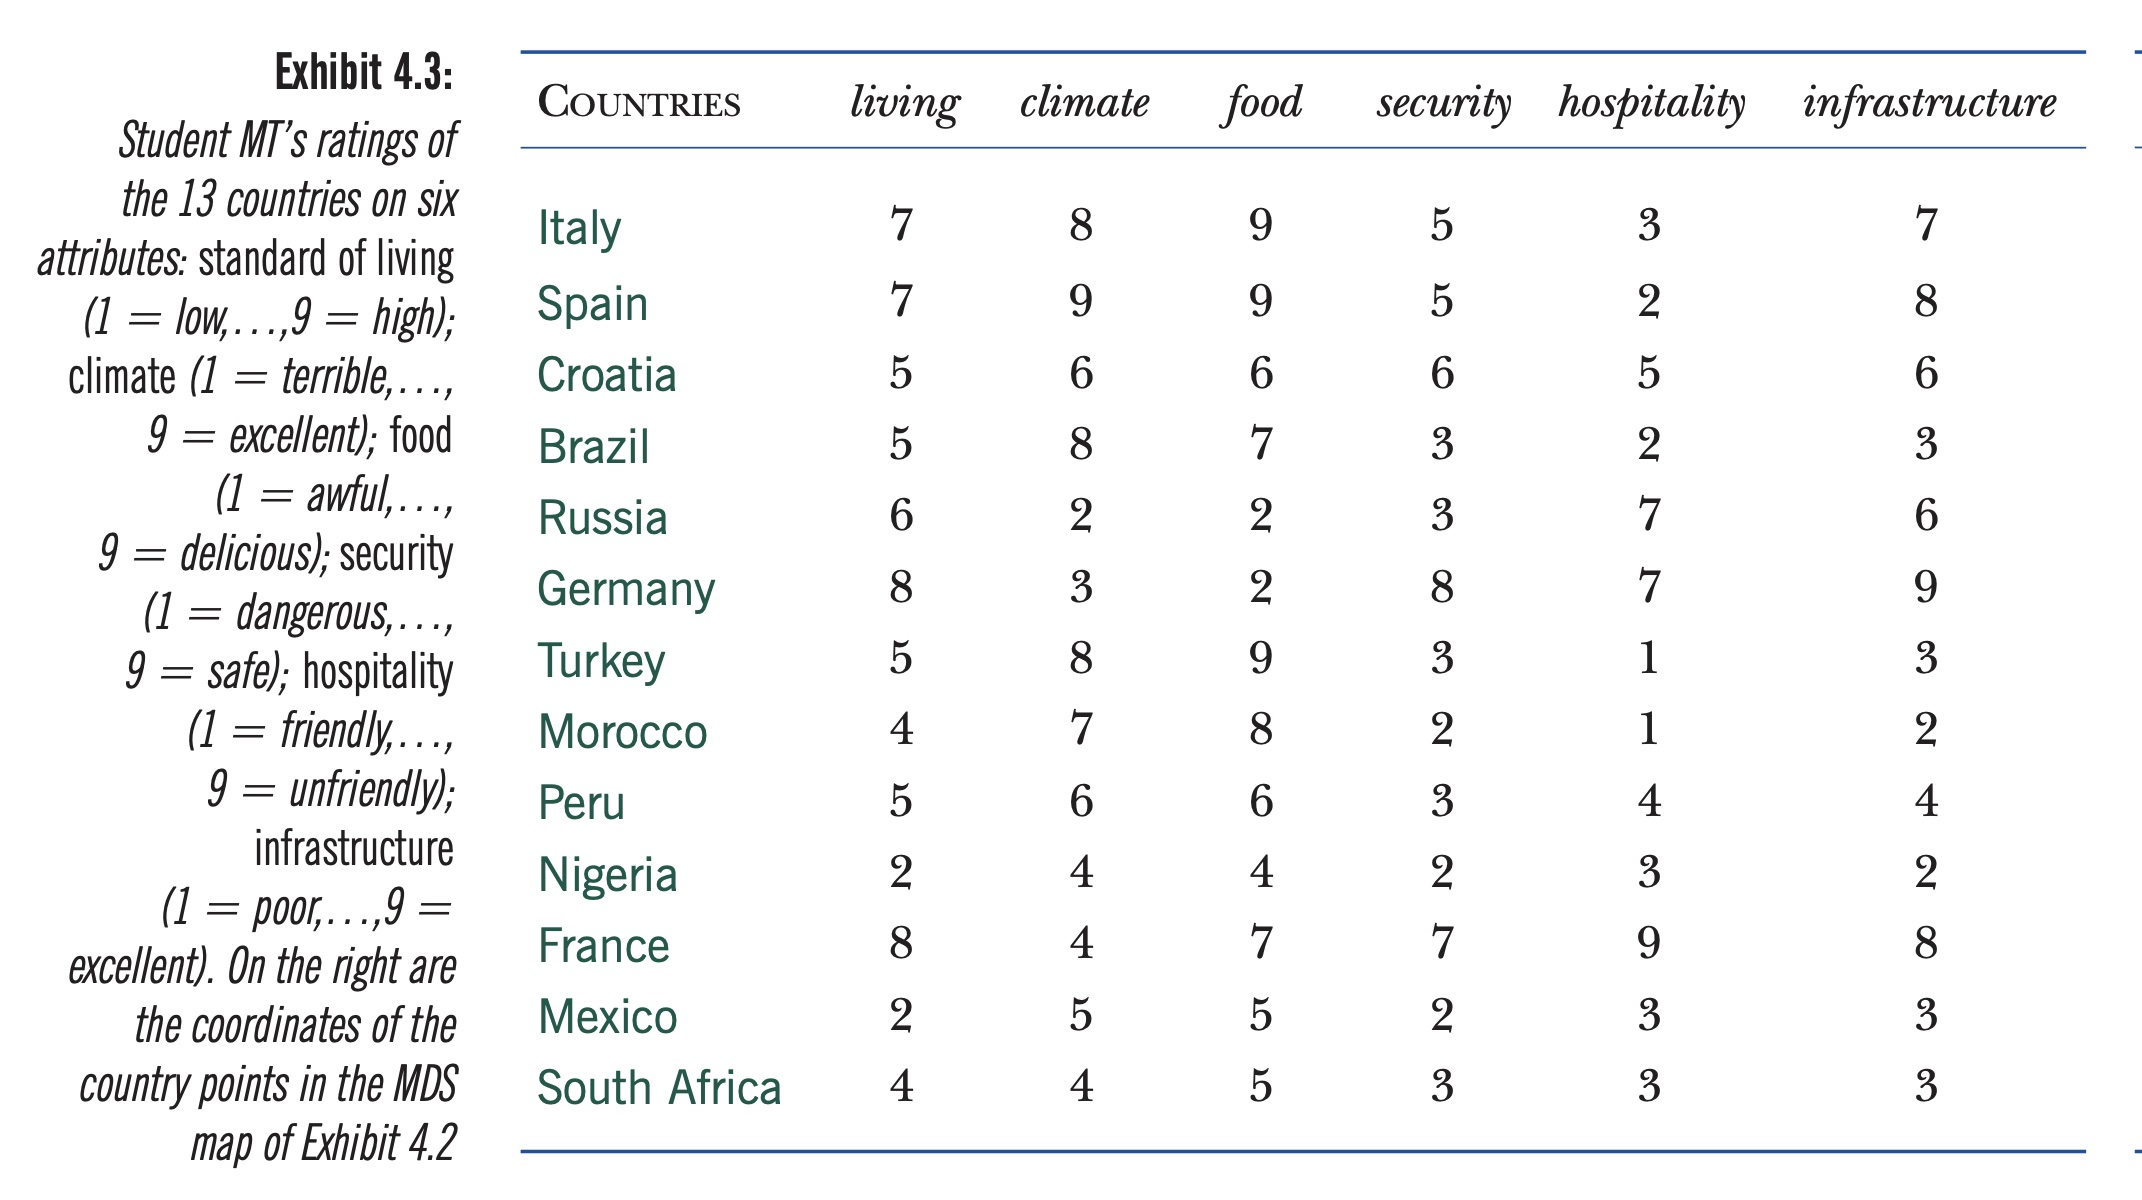



In [33]:
D = np.array([
    [7,8,9,5,3,7],
    [7,9,9,5,2,8],
    [5,6,6,6,5,6],
    [5,8,7,3,2,3],
    [6,2,2,3,7,6],
    [8,3,2,8,7,9],
    [5,8,9,3,1,3],
    [4,7,8,2,1,2],
    [5,6,6,3,4,4],
    [2,4,4,2,3,2],
    [8,4,7,7,9,8],
    [2,5,5,2,3,3],
    [4,4,5,3,3,3]
])
#centering (remove the average)
D_c = D - np.mean(D, axis=0)
#print(D_c)

U,S,Vh = np.linalg.svd(D_c, full_matrices=False)

print(f"Singular values are : {S}")
print(f"SVD_Error=||D_c-U*S*Vh||={np.linalg.norm(D_c-U@np.diag(S)@Vh)}")
L=U[:,0:2]@np.diag(S[:2])
R = Vh[:2,:]
print(f"L={L}")
print(f"R={R}")
print(f"2 rank approx error  = {np.linalg.norm(D_c-L@R)}")

#name of countries
n = ["Italy", "Spain", "Croatia", "Brazil", "Russia",  "Germany","Turkey", "Morrocco", "Peru", "Nigeria", "France", "Mexico", "South Africa"]

#names of variables
f = ["living","climate", "food","security","hospitality", "infrastructure"]

Singular values are : [14.65134336 11.39501638  3.69999736  2.7055456   2.13773581  1.58973339]
SVD_Error=||D_c-U*S*Vh||=1.3361376699685856e-14
L=[[ 0.07961026  4.7684249 ]
 [ 0.45133324  5.7962028 ]
 [-1.79079771  0.84162266]
 [ 3.44797107  0.90619483]
 [-4.54170301 -4.35945144]
 [-8.30948913 -0.54464651]
 [ 4.59909375  2.23063403]
 [ 5.19232134  0.08628152]
 [ 0.91300892 -0.62414874]
 [ 2.59114505 -4.86429718]
 [-6.69562651  2.00627835]
 [ 2.71576869 -3.38057248]
 [ 1.34736404 -2.86252274]]
R=[[-0.33054586  0.32000755  0.30134111 -0.38730537 -0.54844045 -0.49672503]
 [ 0.37479322  0.51737129  0.593462    0.28583459 -0.1375152   0.37289141]]
2 rank approx error  = 5.301615232992757


---
**Biplot**

The matrix L is $m \times 2$ and each row corresponds to a county - with response compressed to two entries. R is $6 \times 2$ and corresponds to the each of the 6 variables (represented as 2D vector)

Plotting both data on same graph, with rows of L (which are the cases) as points and columns of R (which are the features/variables) as vectors from origin is a Biplot

The projection of each point onto a particular vector (variable) indicates the contribution of that variable to that case.

Also the angle between the vectors represents the correlation between the variables.


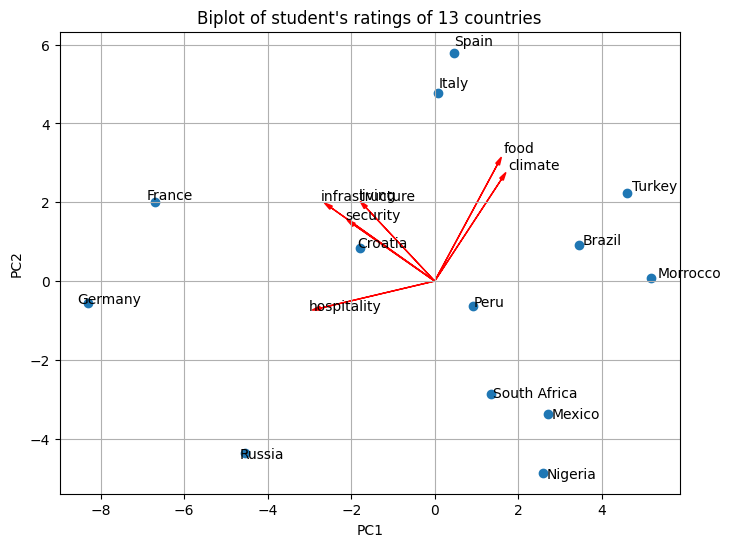

In [34]:
# prompt: plot rows of L as points and columns of R as vectors

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot the rows of L as points
plt.scatter(L[:, 0], L[:, 1])
#add country names
for i in range(L.shape[0]):
  plt.text(L[i,0] * 1.03, L[i,1] * 1.03, f'{n[i]}')


# Plot the columns of R as vectors
#arrow scale
k = 5


for i in range(R.shape[1]):
  plt.arrow(0, 0, k*R[0,i], k*R[1,i], head_width=0.1, head_length=0.2, fc='r', ec='r')
  plt.text(k*R[0,i] * 1.1, k*R[1,i] * 1.1, f'{f[i]}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot of student\'s ratings of 13 countries')
plt.grid(True)
plt.show()

---
**Q7**

a)Which countries have good food & climate?

b)Which countries have good security & infrastructure

Note hospitality actually refers poor support for visitor.

c) which countries have poor hospitality?

d) What variables are strongly correlated?

---
**A Brief on Number Representations**

Floating point numbers are presented as below (https://en.wikipedia.org/wiki/Floating-point_arithmetic):

Type | Total Bits | sign | exponent | mantissa | bits of precision | exponent bias  | decimal digits(mantissa)
-----|------------|------|----------|----------|-------------------|----------|------------
Half Precision | 16 | 1 | 5 | 10 | 11 | 15 | ~3.3
Single Precision|32 | 1 | 8 | 23 | 24 |127 | ~7.2
Double Precision|64 | 1 | 11| 52 | 53 |1023|~15.9
Extended Precision (x86)|80| 1| 15| 64 | 64 |16383|~19.2

Lets take 16-bit numbers as an example.
the left most bit: is the sign bit.
Next 10 bits are the mantissa (or significand).
Last 5 bits are exponent.

Normalized numbers have a binarypoint after the first bit and the first bit is always 1. For example, a binary number 0.001x$2^0$ is represented as 1.000 x $2^{-3}$. That is, you left shift till the first non-zero bit comes to the first location (and corresponding adjust the exponent).

Since the first bit is '1' for a normalized representation, we dont need to store it. Hence we effectively have 10+1 = 11 bits of precision. Precision refers to the accuracy of representation. The gap between two numbers representable by the mantissa is $2^{-10}$ and the round-off error is half of that and is $2^{-11}$

The exponent takes values from 00000 (0) to 11111 (31). All 1's is used to represent infitinity and NaN and all 0 for sub-normal numbers (where the first bit is not 1) Hence the exponent ranges from 1 to 30. With exponent bias of 15, the represented exponent is subtracted by the bias  to give the actual exponent. for example, an exponent if -11 is represented as -11+15 = 4. Hence the representable exponents range from -14 to 15 (30 values)

Ans:

In [35]:
print("float16 info:",np.finfo(np.float16) )

float16 info: Machine parameters for float16
---------------------------------------------------------------
precision =   3   resolution = 1.00040e-03
machep =    -10   eps =        9.76562e-04
negep =     -11   epsneg =     4.88281e-04
minexp =    -14   tiny =       6.10352e-05
maxexp =     16   max =        6.55040e+04
nexp =        5   min =        -max
smallest_normal = 6.10352e-05   smallest_subnormal = 5.96046e-08
---------------------------------------------------------------



---
**Q8**

a) Write the binary representation of largest positive 16-bit float number and check its value against max above.

b) Write the binary representation of smallest normal positive number (also called tiny above) and check its value against above

c) Write the binary representation of smallest sub-normal positive number (also called tiny above) and check its value against above

d) Write the binary representation of smallest positive number above 1 and calculate its difference w.r.t 1 - also called eps above

e) Write the binary representation of the largest positive number less than 1 and calculate its difference w.r.t 1 - also called epsneg above

Ans:


In [36]:
#Cross check with above
<your code here>

SyntaxError: invalid syntax (634748292.py, line 2)